# HW02

최재필

https://nbviewer.org/github/jaepil-choi/fbaquant23/blob/master/s1.2ap/hw/s1.2ap_hw02.ipynb

Solve the following problems

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ks_2samp

from pathlib import Path

In [19]:
np.random.seed(123)

In [20]:
data_path = Path('.').resolve() / 'data'
data_path

WindowsPath('E:/VSCodeProjects/fbaquant23/s1.2ap/hw/data')

## Problem 1

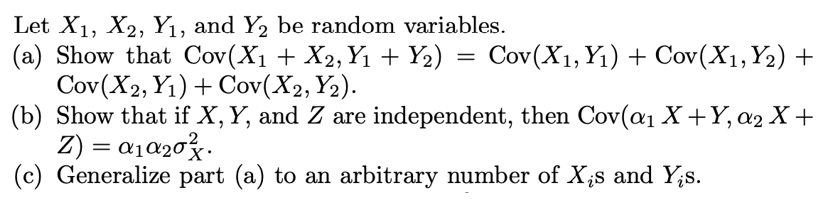

### a

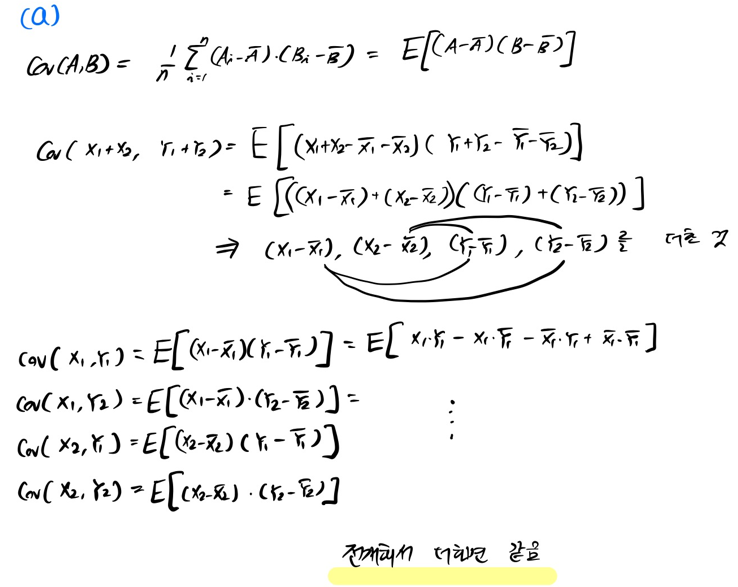

### b

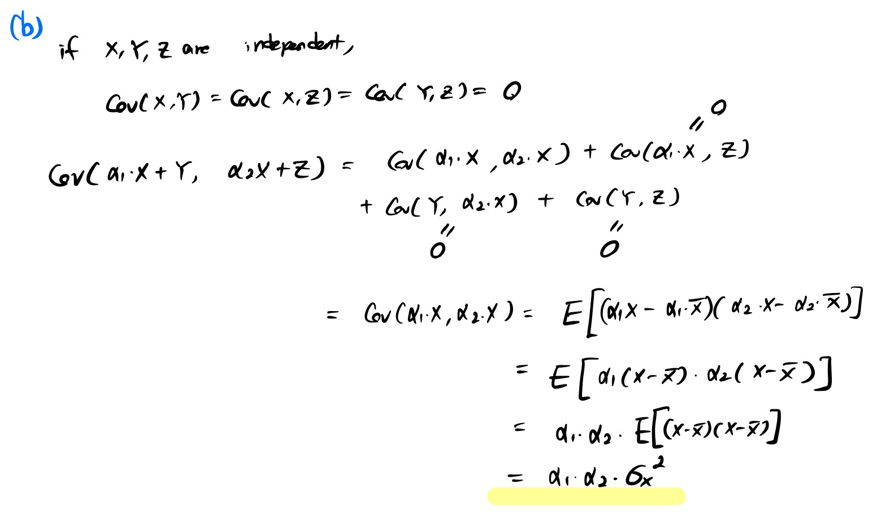

### c

....??

## Problem 2

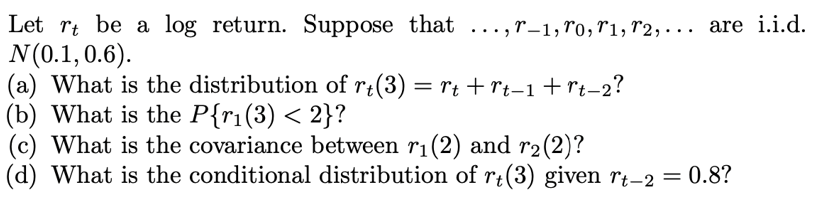

### a

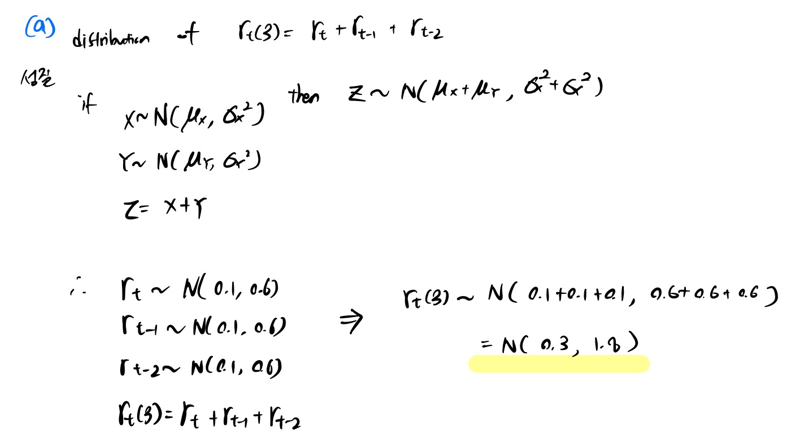

### b

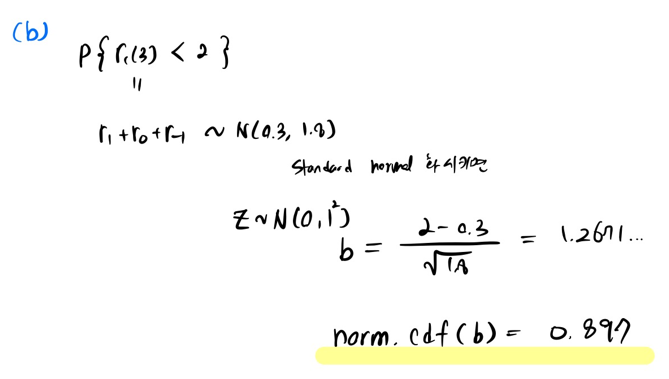

In [21]:
b = (2 - 0.3) / np.sqrt(1.8)
b


1.2671051872498809

In [22]:
norm.cdf(b)

0.8974411594832974

### c

...??

## Problem 3

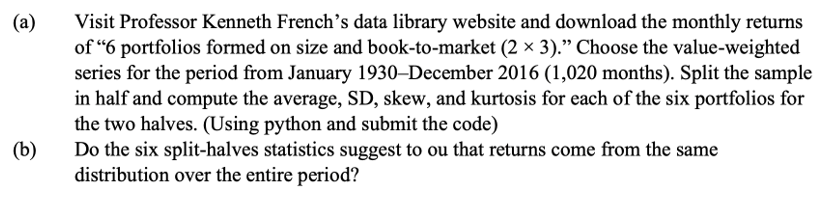

### a. download data and calculate period 1, 2's avg/sd/skew/kurt for each portfolio

In [23]:
df = pd.read_csv(data_path / '6_Portfolios_2x3.csv', skiprows=15, nrows=1159)
df = df.iloc[:-1] # drop last row "Copyright 2022 Kenneth R. French"
df.rename(columns={'Unnamed: 0': 'yearmonth'}, inplace=True)
df.set_index('yearmonth', drop=True, inplace=True)

In [24]:
df.index = df.index.astype(int)
df = df.astype(float)

In [25]:
df = df[(193001 <= df.index) & (df.index <= 201612)]

In [26]:
len(df)

1044

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/six_portfolios.html

The portfolios, which are constructed at the end of each June, are the intersections of 2 portfolios formed on size (market equity, ME) and 3 portfolios formed on the ratio of book equity to market equity (BE/ME). The size breakpoint for year t is the median NYSE market equity at the end of June of year t. BE/ME for June of year t is the book equity for the last fiscal year end in t-1 divided by ME for December of t-1. The BE/ME breakpoints are the 30th and 70th NYSE percentiles.
 	 	 
 	 	
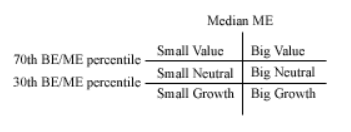
 	 	 
Stocks:	 	
The portfolios for July of year t to June of t+1 include all NYSE, AMEX, and NASDAQ stocks for which we have market equity data for December of t-1 and June of t, and (positive) book equity data for t-1.

In [27]:
df1 = df.iloc[:int(len(df)/2)]
df2 = df.iloc[int(len(df)/2):]

In [28]:
# 193001 ~ 197306
df1_stats = df1.agg(
    {
        col: ['mean', 'std', 'skew', 'kurt', 'min', 'max'] for col in df1.columns
    }
)

df1_stats

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
mean,1.024198,1.213739,1.511161,0.822079,0.851891,1.219600
std,8.167532,8.403087,10.213409,5.725235,6.749528,8.955875
skew,1.247393,1.661972,2.371228,0.162872,1.765079,1.765771
kurt,9.459034,13.269433,17.726410,7.094208,17.955376,14.479576
min,-29.935400,-30.052100,-33.873700,-28.866300,-28.150700,-35.113100
max,59.573000,62.196500,83.495700,33.766000,51.942100,67.748600


In [29]:
# 197307 ~ 201612
df2_stats = df2.agg(
    {
        col: ['mean', 'std', 'skew', 'kurt', 'min', 'max'] for col in df2.columns
    }
)

df2_stats

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
mean,0.970406,1.356887,1.474460,0.911314,1.047693,1.146156
std,6.877888,5.416383,5.623990,4.752205,4.400784,4.983831
skew,-0.395605,-0.556910,-0.475605,-0.310020,-0.433611,-0.544072
kurt,2.052874,3.329589,4.147116,1.956930,2.416848,2.752151
min,-32.482900,-27.891500,-27.846700,-23.215800,-20.322300,-21.617200
max,28.290100,26.742400,30.694500,21.243500,16.933500,21.277100


### b. Are the returns coming from the same distribution over the entire period?

우선 통계량을 기준으로 간단히 확인해보면, 

In [ ]:
df1_stats - df2_stats

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
mean,0.053793,-0.143148,0.036701,-0.089235,-0.195802,0.073444
std,1.289643,2.986703,4.589419,0.973029,2.348744,3.972044
skew,1.642997,2.218882,2.846833,0.472892,2.198689,2.309843
kurt,7.406160,9.939844,13.579294,5.137278,15.538527,11.727425
min,2.547500,-2.160600,-6.027000,-5.650500,-7.828400,-13.495900
max,31.282900,35.454100,52.801200,12.522500,35.008600,46.471500


Missing data are indicated by -99.99 or -999. 라고 했는데 

min, max 에 -99.99, +99.99 없으니 missing data는 없음. 




두 기간 사이 수익률 분포에 큰 차이가 있다면 시간이 지나며 market regime이 바뀌었다고 볼 수 있음. 

각 포트폴리오별 통계값의 diff 를 보면, 

포트폴리오마다 mean return이 어떤 건 1930~1973 이 더 크고, 어떤 건 1973~2016이 더 크다. 이걸론 알기 힘듦. 

skew와 kurt는 1973~2016 의 기간이 더 컸는데, 
- skew: 많은 수익률이 mean보다 작았고, 
- kurt: 수익률이 많이 작거나 많이 큰 tail이 더 길었다. 

두 쌤플이 같은 분포에서 나왔는지 검정하는 테스트: KS Test

https://www.youtube.com/watch?v=ZO2RmSkXK3c&list=WL&index=4

https://www.graphpad.com/guides/prism/latest/statistics/interpreting_results_kolmogorov-smirnov_test.htm

`ks_2samp`의 결과:
- `statistic` 은 두 쌤플의 cdf끼리의 최대 높이 차이를 나타냄. (`d`)
- `pvalue` 는 `d`가 유의한지 나타냄. 

H0: 두 쌤플은 같은 분포에서 나왔다. 

In [31]:
P_THRES = 0.05

SMALL LoBM

    KS test 결과: 
    - D = 0.049808
    - p_value = 0.536974

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각할 수 없다. 
        
        SMALL LoBM 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 말할 수 없다. 
        


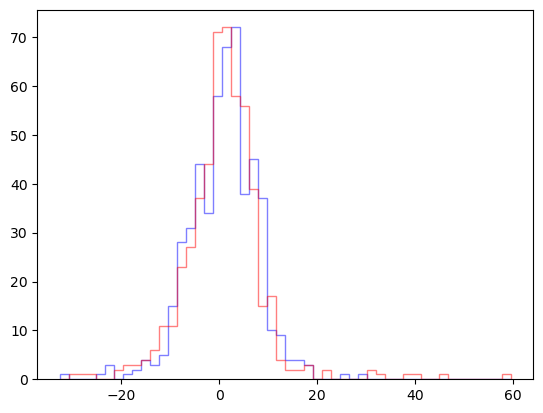

ME1 BM2

    KS test 결과: 
    - D = 0.065134
    - p_value = 0.218245

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각할 수 없다. 
        
        ME1 BM2 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 말할 수 없다. 
        


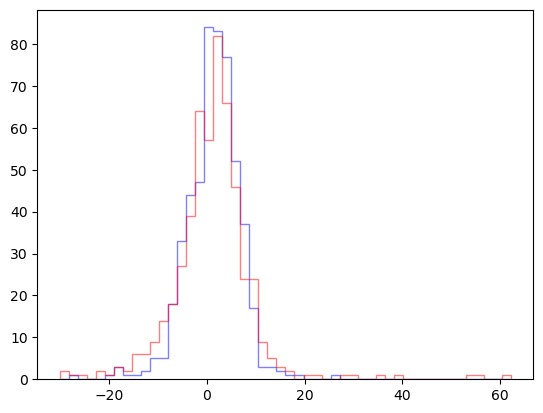

SMALL HiBM

    KS test 결과: 
    - D = 0.101533
    - p_value = 0.009167

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각한다. 
        
        SMALL HiBM 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 할 수 있다. 
        


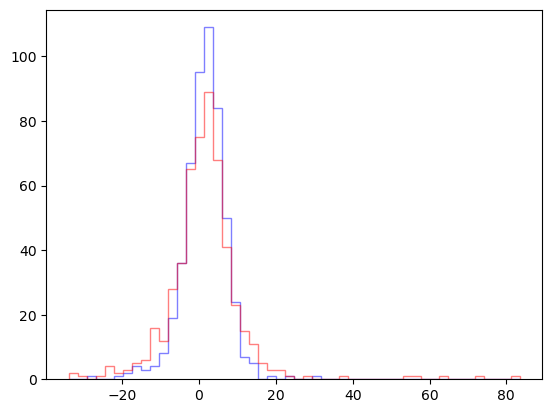

BIG LoBM

    KS test 결과: 
    - D = 0.044061
    - p_value = 0.691969

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각할 수 없다. 
        
        BIG LoBM 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 말할 수 없다. 
        


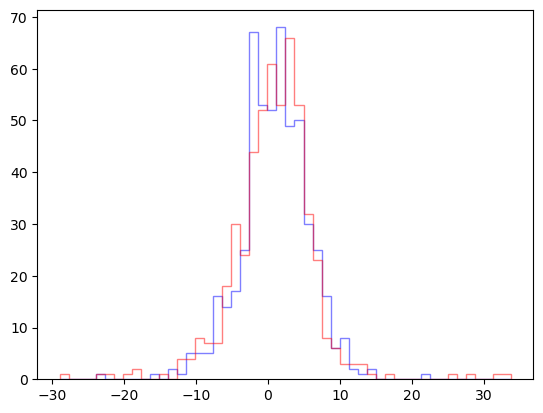

ME2 BM2

    KS test 결과: 
    - D = 0.067050
    - p_value = 0.191290

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각할 수 없다. 
        
        ME2 BM2 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 말할 수 없다. 
        


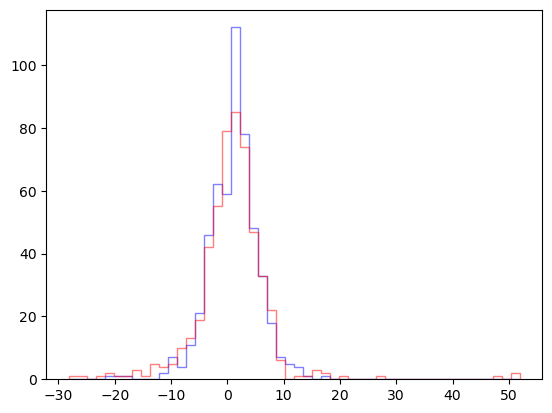

BIG HiBM

    KS test 결과: 
    - D = 0.084291
    - p_value = 0.048971

    유의수준(significance level) = 0.05 에서     
    

        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각한다. 
        
        BIG HiBM 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 할 수 있다. 
        


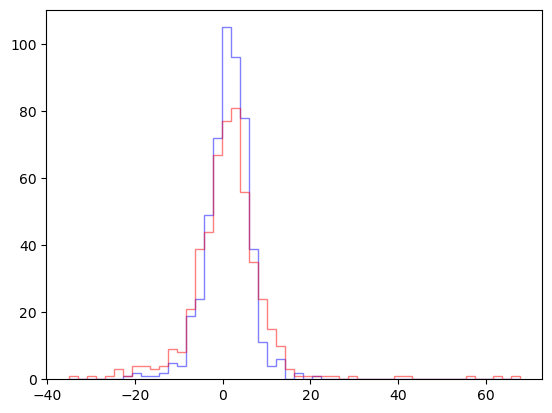

In [35]:
for col in df.columns:
    print(col)
    df1_data = df1[col].values
    df2_data = df2[col].values

    d, pvalue = ks_2samp(df1_data, df2_data)

    print(f'''
    KS test 결과: 
    - D = {d:4f}
    - p_value = {pvalue:4f}

    유의수준(significance level) = {P_THRES} 에서     
    ''')
    
    if pvalue <= P_THRES:
        print(f'''
        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각한다. 
        
        {col} 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 할 수 있다. 
        ''')
    else:
        print(f'''
        귀무가설(두 쌤플이 같은 분포에서 나왔음)을 기각할 수 없다. 
        
        {col} 포트폴리오의 1930~1973 수익률 분포와 1973~2016 수익률 분포는 서로 다른 분포에서 나왔다고 말할 수 없다. 
        ''')

    plt.hist([df1_data, df2_data], color=['r', 'b'], alpha=0.5, bins=50, histtype='step')[2]
    plt.show()

## Problem 4

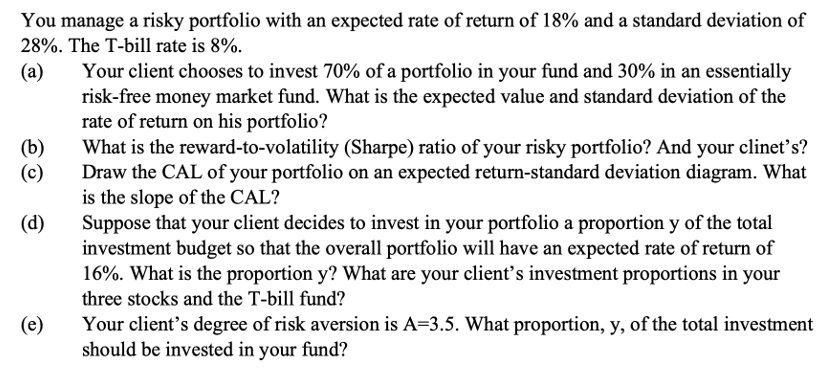

In [39]:
my_port_ret = 0.18
my_std = 0.28
rf = 0.08

### a. port:rf = 7:3 일 때 expected return & std?

In [43]:
w1 = 0.7

client_port_ret = w1 * my_port_ret + (1-w1) * rf
client_port_ret

0.15

rf 의 std=0 이라고 할 때, 

In [41]:
client_port_std = w1 ** 2 * my_std
client_port_std

0.1372

### b. Sharpe ratio of my / client's portfolio

In [42]:
my_sharpe = (my_port_ret - rf) / my_std
my_sharpe

0.3571428571428571

In [44]:
client_sharpe = (client_port_ret - rf) / client_port_std
client_sharpe

0.5102040816326531

### c. Draw my portfolio's CAL. What is the slope?

CAL: Capital Allocation Line

<AxesSubplot: xlabel='0', ylabel='1'>

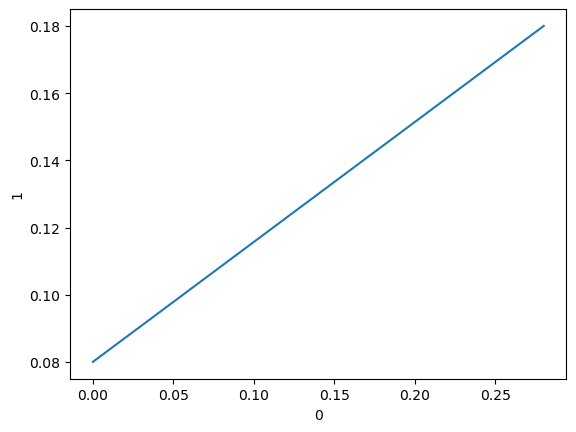

In [69]:
point_rf = (0, rf)
point_port = (my_std, my_port_ret)

CAL = pd.DataFrame([point_rf, point_port])

sns.lineplot(CAL, x=0, y=1)

In [70]:
slope = (my_port_ret - rf) / (my_std - 0)
slope

0.3571428571428571

### d. Calculate

If:
- The client invests proportion `y` of the total budget in my portfolio 
- Overall client portfolio should have expected return of 16%

What is:
- `y`?
- Client's investment proportion `fund : t-bill`


### e. If your client's risk aversion `A=3.5`, calculate `y`. 

`y` is the client's investment proportion